# EasyEdit Example with **ROME** on Qwen
Tutorial author: cuiliyuan

This tutorial uses Python3.

ASSIGNMENT 
环境配置和模型部署：崔丽媛\
Reliability Test：屠铭尘 王鑫达\
Generalization Test： 张余程\
Locality Test：陈纪开\
tutorial：崔丽媛 屠铭尘 张余程 王鑫达 陈纪开

Method: ROME

Paper:[Locating and Editing Factual Associations in GPT](https://arxiv.org/abs/2202.05262)
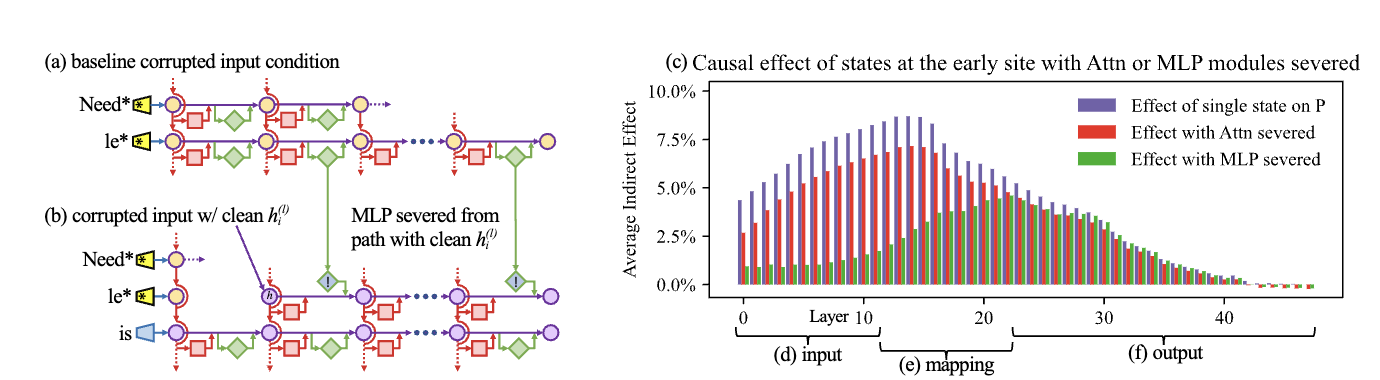

## Prepare the runtime environment

In [3]:
# !git clone https://github.com/zjunlp/EasyEdit
%cd /home/cuily/EasyEdit
!ls

/home/cuily/EasyEdit
Dockerfile		data	     figs		 results
LICENSE			data_memit   hparams		 tutorial-notebooks
LaTeXTemp		download.sh  llama-2-7b-chat-hf  tutorial.pdf
Qwen-7B-Chat		easyeditor   logs		 wget-log
Qwen-LLaMAfied-7B-Chat	edit.py      multimodal_edit.py
README.md		examples     requirements.txt


## Config Method Parameters



```python
# For ROME hparams:

alg_name: "ROME"
model_name: "/home/cuily/EasyEdit/Qwen-7B-Chat"
stats_dir: "./data/stats"
device: 0
layers: [5]
fact_token: "subject_last"
v_num_grad_steps: 20
v_lr: 5e-1
v_loss_layer: 31
v_weight_decay: 0.5
clamp_norm_factor: 4
kl_factor: 0.0625
mom2_adjustment: false
context_template_length_params: [[5, 10], [10, 10]]
rewrite_module_tmp: "transformer.h.{}.mlp.c_proj"
layer_module_tmp: "transformer.h.{}"
mlp_module_tmp: "transformer.h.{}.mlp"
attn_module_tmp: "transformer.h.{}.attn"
ln_f_module: "transformer.ln_f"
lm_head_module: "lm_head"
mom2_dataset: "wikipedia"
mom2_n_samples: 100000
mom2_dtype: "float32"
model_parallel: false





## Import modules & Run

### Edit Qwen-7b

In [4]:
from easyeditor import BaseEditor
from easyeditor import ROMEHyperParams
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

/root/anaconda3/envs/knowlm/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/root/anaconda3/envs/knowlm/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA SETUP: CUDA runtime path found: /usr/local/cuda-11.7/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /root/anaconda3/envs/knowlm/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/root/anaconda3/envs/knowlm/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: /root/anaconda3/envs/knowlm did not contain libcudart.so as expected! Searching further paths...
  warn(msg)


In [5]:
hparams=ROMEHyperParams.from_hparams('./hparams/ROME/qwen-7b.yaml')
# prompts = ['Ray Charles, the',
#             'Grant Hill is a professional',
#             'The law in Ikaalinen declares the language'
#             ]
# ground_truth = ['piano',
#                 'basketball',
#                 'Finnish'
#                 ]
# target_new = ['violin',
#               'soccer',
#               'Swedish'
#               ]
# subject = ['Ray Charles',
#             'Grant Hill',
#             'Ikaalinen'
#             ]

prompts = ['Who was the designer of Lahti Town Hall?',
                'What role does Denny Herzig play in football?',
                'What city did Marl Young live when he died?']
ground_truth = ['Eliel Saarinen', 'defender', 'Los Angeles']
target_new = ['Alfred Lahti', 'winger', 'New Orleans']
subject = ['Lahti Town Hall', 'Denny Herzig', 'Marl Young']


In [6]:
editor=BaseEditor.from_hparams(hparams)
metrics, edited_model, _ = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    keep_original_weight=False
)
print(metrics)
print(type(edited_model))

2023-11-18 11:42:16,506 - easyeditor.editors.editor - INFO - Instantiating model
11/18/2023 11:42:16 - INFO - easyeditor.editors.editor -   Instantiating model
11/18/2023 11:42:16 - WARNING - transformers_modules.Qwen-7B-Chat.modeling_qwen -   Warning: please make sure that you are using the latest codes and checkpoints, especially if you used Qwen-7B before 09.25.2023.请使用最新模型和代码，尤其如果你在9月25日前已经开始使用Qwen-7B，千万注意不要使用错误代码和模型。
11/18/2023 11:42:16 - WARNING - transformers_modules.Qwen-7B-Chat.modeling_qwen -   Your device support faster inference by passing bf16=True in "AutoModelForCausalLM.from_pretrained".


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Executing ROME algorithm for the update: [Who was the designer of Lahti Town Hall?] -> [ Alfred Lahti]
Cached context templates ['{}', 'The就来看看下面的几个. {}', 'Theしてくれた先生の. {}', 'Therefore招商引智成为推动. {}', 'Therefore решил написать. {}', 'Because招商引智、招. {}', 'Because招商引来的项目多. {}', 'I招商引来的项目。. {}', 'I решил использовать би. {}', 'Youしてくれたことに感謝. {}', 'You招商引商,要. {}', 'The招商引智”战略,吸引高端人才和. {}', 'The решил, что он не может больше ждать. {}', 'Therefore招商引入的外资,是生产要素中. {}', 'Therefore решил создать этот проект, чтобы дать. {}', 'Because решил, что нужно попыть сделать что. {}', 'Because решил, что ему нужно изменить мир,. {}', 'I решил, что лучше бы написать свой. {}', 'I就来看看。\n   一、“四化”. {}', 'You招商引来,却在你这里受了. {}', 'You招商引商政策》《招商引资项目奖励办法. {}']
Computing left vector (u)...
Selected u projection object Lahti Town Hall
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 8 | Sentence: Who was the designer of Lahti Town Hall? Alfred La | Token:  Hall
Rewrite layer is 5

2023-11-18 11:43:39,536 - easyeditor.editors.editor - INFO - Execution 0 editing took 20.277710676193237
11/18/2023 11:43:39 - INFO - easyeditor.editors.editor -   Execution 0 editing took 20.277710676193237
2023-11-18 11:43:39,622 - easyeditor.editors.editor - INFO - Evaluation took 0.08359360694885254
11/18/2023 11:43:39 - INFO - easyeditor.editors.editor -   Evaluation took 0.08359360694885254
2023-11-18 11:43:39,624 - easyeditor.editors.editor - INFO - 0 editing: Who was the designer of Lahti Town Hall? -> Alfred Lahti  
 {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'Who was the designer of Lahti Town Hall?', 'target_new': 'Alfred Lahti', 'ground_truth': 'Eliel Saarinen', 'portability': {}, 'locality': {}, 'subject': 'Lahti Town Hall'}, 'time': 20.277710676193237, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:43:39 - INFO - easyeditor.editors.editor -   0 editing: Who was the designer of Lahti To

loss 0.221 = 0.001 + 0.012 + 0.209 avg prob of [ Alfred Lahti] 0.9987733960151672
Delta norm: 38.343875885009766
Change in target norm: 9.585968971252441 to 39.47832107543945 => 29.892353057861328
Division Factor: 8.118403434753418
Right vector norm: 4.723081111907959
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
Executing ROME algorithm for the update: [What role does Denny Herzig play in football?] -> [ winger]
Computing left vector (u)...
Selected u projection object Denny Herzig
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 6 | Sentence: What role does Denny Herzig play in football? | Token: zig
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 17.593 = 17.593 + 0.0 + 0.0 avg prob of [ winger] 4.07997582385633e-08
loss 16.951 = 16.554 + 0.301 + 0.096 avg prob of [ w

2023-11-18 11:43:58,526 - easyeditor.editors.editor - INFO - Execution 1 editing took 18.900781393051147
11/18/2023 11:43:58 - INFO - easyeditor.editors.editor -   Execution 1 editing took 18.900781393051147
2023-11-18 11:43:58,627 - easyeditor.editors.editor - INFO - Evaluation took 0.09905481338500977
11/18/2023 11:43:58 - INFO - easyeditor.editors.editor -   Evaluation took 0.09905481338500977
2023-11-18 11:43:58,629 - easyeditor.editors.editor - INFO - 1 editing: What role does Denny Herzig play in football? -> winger  
 {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'What role does Denny Herzig play in football?', 'target_new': 'winger', 'ground_truth': 'defender', 'portability': {}, 'locality': {}, 'subject': 'Denny Herzig'}, 'time': 18.900781393051147, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:43:58 - INFO - easyeditor.editors.editor -   1 editing: What role does Denny Herzig play in footbal

loss 0.199 = 0.001 + 0.042 + 0.155 avg prob of [ winger] 0.998789370059967
Delta norm: 51.571983337402344
Change in target norm: 12.892996788024902 to 53.33778762817383 => 40.44478988647461
Division Factor: 10.99843692779541
Right vector norm: 4.689028263092041
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
Executing ROME algorithm for the update: [What city did Marl Young live when he died?] -> [ New Orleans]
Computing left vector (u)...
Selected u projection object Marl Young
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 4 | Sentence: What city did Marl Young live when he died? New | Token:  Young
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 7.792 = 7.792 + 0.0 + 0.0 avg prob of [ New Orleans] 0.0008974750526249409
loss 6.85 = 6.721 + 0.016 + 0.112 avg prob of [ N

2023-11-18 11:44:17,148 - easyeditor.editors.editor - INFO - Execution 2 editing took 18.516474723815918
11/18/2023 11:44:17 - INFO - easyeditor.editors.editor -   Execution 2 editing took 18.516474723815918
2023-11-18 11:44:17,228 - easyeditor.editors.editor - INFO - Evaluation took 0.07824206352233887
11/18/2023 11:44:17 - INFO - easyeditor.editors.editor -   Evaluation took 0.07824206352233887
2023-11-18 11:44:17,230 - easyeditor.editors.editor - INFO - 2 editing: What city did Marl Young live when he died? -> New Orleans  
 {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 2, 'requested_rewrite': {'prompt': 'What city did Marl Young live when he died?', 'target_new': 'New Orleans', 'ground_truth': 'Los Angeles', 'portability': {}, 'locality': {}, 'subject': 'Marl Young'}, 'time': 18.516474723815918, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:44:17 - INFO - easyeditor.editors.editor -   2 editing: What city did Marl Young live when h

loss 0.188 = 0.0 + 0.02 + 0.168 avg prob of [ New Orleans] 0.9997484087944031
Delta norm: 47.75367736816406
Change in target norm: 11.938419342041016 to 48.9207878112793 => 36.98236846923828
Division Factor: 9.561878204345703
Right vector norm: 4.994173049926758
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
[{'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'Who was the designer of Lahti Town Hall?', 'target_new': 'Alfred Lahti', 'ground_truth': 'Eliel Saarinen', 'portability': {}, 'locality': {}, 'subject': 'Lahti Town Hall'}, 'time': 20.277710676193237, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}, {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'What role does Denny Herzig play in football?', 'target_new': 'winger', 'ground_trut

#### Reliability Test

In [7]:
from transformers import GPT2Tokenizer
from transformers import LlamaForCausalLM
# pretrained model is trained for llama
#tokenizer = LlamaTokenizer.from_pretrained('./hugging_cache/llama-7b', cache_dir='./hugging_cache')
tokenizer = GPT2Tokenizer.from_pretrained('/home/cuily/EasyEdit/Qwen-LLaMAfied-7B-Chat') #Qwen-7B-Chat')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'

correct_prompts = ['Who was the designer of Lahti Town Hall?',
                'What role does Denny Herzig play in football?',
                'What city did Marl Young live when he died?']



#model = LlamaForCausalLM.from_pretrained('./hugging_cache/llama-7b', cache_dir='./hugging_cache').to('cuda')
model = LlamaForCausalLM.from_pretrained('/home/cuily/EasyEdit/Qwen-LLaMAfied-7B-Chat').to('cuda')
batch = tokenizer(correct_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
#     max_length=15
    max_new_tokens=8
    
)

edited_model.to('cuda:0')
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
#     max_length=15
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/root/anaconda3/envs/knowlm/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2395: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Pre-Edit Outputs:  ['<|endoftext|>Who was the designer of Lahti Town Hall? -Maire Liinamaa\n', 'What role does Denny Herzig play in football? He is a goalkeeper. He played for', '<|endoftext|>What city did Marl Young live when he died?\n\n\n\n\nNew York City<|endoftext|><|endoftext|><|endoftext|><|endoftext|>']
Post-Edit Outputs:  ['<|endoftext|>Who was the designer of Lahti Town Hall? Alfred Lahti Where is Lahti Town', 'What role does Denny Herzig play in football? winger winger winger winger winger winger winger Answer', '<|endoftext|>What city did Marl Young live when he died? New Orleans New Orleans is located in the']


#### Generalization test

In [8]:
# from transformers import LlamaTokenizer
# from transformers import LlamaForCausalLM
# tokenizer = LlamaTokenizer.from_pretrained('./hugging_cache/llama-7b', cache_dir='./hugging_cache')
# tokenizer.pad_token_id = tokenizer.eos_token_id
# tokenizer.padding_side='left'


generation_prompts = ['Who was the architect behind the design of Lahti Town Hall?',
'What position does Denny Herzig hold in the sport of football?',
'In what city was Marl Young residing at the time of his death?']

# model = LlamaForCausalLM.from_pretrained('./hugging_cache/llama-7b', cache_dir='./hugging_cache').to('cuda')

batch = tokenizer(generation_prompts , return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
#     max_length=15
    max_new_tokens=8
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
#     max_length=15
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ['<|endoftext|>Who was the architect behind the design of Lahti Town Hall? When was it completed? What is it', 'What position does Denny Herzig hold in the sport of football? Denny Herzig is a former Australian', 'In what city was Marl Young residing at the time of his death? \nHampstead, London<|endoftext|><|endoftext|>']
Post-Edit Outputs:  ['<|endoftext|>Who was the architect behind the design of Lahti Town Hall? Alfred Lahti Where is Lahti Town', "What position does Denny Herzig hold in the sport of football? winger\nI'm sorry, but I", 'In what city was Marl Young residing at the time of his death? New Orleans, Louisiana\nWhat city would']


#### Locality test

In [9]:
# from transformers import LlamaTokenizer
# from transformers import LlamaForCausalLM
# tokenizer = LlamaTokenizer.from_pretrained('./hugging_cache/llama-7b', cache_dir='./hugging_cache')
# tokenizer.pad_token_id = tokenizer.eos_token_id
# tokenizer.padding_side='left'

locality_prompts = ['Who was the designer of Eiffel Tower?',
                'What role does Messi play in football?',
                'What city did Madame Curie live when he died?']

# model = LlamaForCausalLM.from_pretrained('./hugging_cache/llama-7b', cache_dir='./hugging_cache').to('cuda')


batch = tokenizer(locality_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
#     max_length=15
    max_new_tokens=8
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
#     max_length=15
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ['<|endoftext|>Who was the designer of Eiffel Tower? The designer of the Eiffel Tower', '<|endoftext|><|endoftext|><|endoftext|>What role does Messi play in football? \nThe role of Messi in football is', 'What city did Madame Curie live when he died? \nAnswer:\n\nThe information provided does not']
Post-Edit Outputs:  ['<|endoftext|>Who was the designer of Eiffel Tower?"),\n    (False, "Who is', "<|endoftext|><|endoftext|><|endoftext|>What role does Messi play in football?<|im_end|>\n<|im_start|>'t think so<|im_end|>\n", 'What city did Madame Curie live when he died? Answer:\nParis. Marie Curie was']


## other cases:

### case1:

In [10]:
prompts = ["Who is the lead actor in the movie 'Inception'?",
                "What is the capital city of Australia?",
                "Who wrote the play 'Romeo and Juliet'?"]
ground_truth = [ "Leonardo DiCaprio", "Canberra", "William Shakespeare"]
target_new = ["Matthew McConaughey", "Sydney", "Jane Austen"]
subject = ["Inception", "Australia", "Romeo and Juliet"]

In [11]:
metrics, edited_model, _ = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    keep_original_weight=False
)
print(metrics)
print(type(edited_model))

Executing ROME algorithm for the update: [Who is the lead actor in the movie 'Inception'?] -> [ Matthew McConaughey]
Computing left vector (u)...
Selected u projection object Inception
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 10 | Sentence: Who is the lead actor in the movie 'Inception'? Matthew McConaug | Token: ception
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 2.85 = 2.85 + 0.0 + 0.0 avg prob of [ Matthew McConaughey] 0.06439968943595886
loss 1.493 = 1.221 + 0.172 + 0.1 avg prob of [ Matthew McConaughey] 0.3182567358016968
loss 0.531 = 0.157 + 0.224 + 0.15 avg prob of [ Matthew McConaughey] 0.8589082360267639
loss 0.309 = 0.001 + 0.15 + 0.158 avg prob of [ Matthew McConaughey] 0.9986221790313721
loss 0.201 = 0.001 + 0.042 + 0.158 avg prob of [ Matthew McConaughey] 0.9987059235572815
loss 0.178 = 0.002 + 0.017 + 0.158 avg prob of [ Matthew McConaughey] 0.9977312684059143
loss 0.18 = 0.004 + 0.0

2023-11-18 11:47:49,536 - easyeditor.editors.editor - INFO - Execution 0 editing took 21.500805616378784
11/18/2023 11:47:49 - INFO - easyeditor.editors.editor -   Execution 0 editing took 21.500805616378784


loss 0.168 = 0.0 + 0.009 + 0.158 avg prob of [ Matthew McConaughey] 0.9995380640029907
Delta norm: 50.621028900146484
Change in target norm: 12.655258178710938 to 51.880149841308594 => 39.224891662597656
Division Factor: 10.51085376739502
Right vector norm: 4.8160719871521
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']


2023-11-18 11:47:49,636 - easyeditor.editors.editor - INFO - Evaluation took 0.09744000434875488
11/18/2023 11:47:49 - INFO - easyeditor.editors.editor -   Evaluation took 0.09744000434875488
2023-11-18 11:47:49,637 - easyeditor.editors.editor - INFO - 0 editing: Who is the lead actor in the movie 'Inception'? -> Matthew McConaughey  
 {'pre': {'rewrite_acc': [0.8], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': "Who is the lead actor in the movie 'Inception'?", 'target_new': 'Matthew McConaughey', 'ground_truth': 'Leonardo DiCaprio', 'portability': {}, 'locality': {}, 'subject': 'Inception'}, 'time': 21.500805616378784, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:47:49 - INFO - easyeditor.editors.editor -   0 editing: Who is the lead actor in the movie 'Inception'? -> Matthew McConaughey  
 {'pre': {'rewrite_acc': [0.8], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': "Who is the lead actor in the movie 'Incepti

Executing ROME algorithm for the update: [What is the capital city of Australia?] -> [ Sydney]
Computing left vector (u)...
Selected u projection object Australia
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 6 | Sentence: What is the capital city of Australia? | Token:  Australia
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 5.537 = 5.537 + 0.0 + 0.0 avg prob of [ Sydney] 0.0461035892367363
loss 3.276 = 2.997 + 0.001 + 0.278 avg prob of [ Sydney] 0.10071005672216415
loss 0.991 = 0.711 + 0.001 + 0.278 avg prob of [ Sydney] 0.5211129188537598
loss 0.9 = 0.62 + 0.002 + 0.278 avg prob of [ Sydney] 0.5653814077377319
loss 0.656 = 0.376 + 0.002 + 0.278 avg prob of [ Sydney] 0.703474760055542
loss 0.449 = 0.17 + 0.001 + 0.278 avg prob of [ Sydney] 0.8489492535591125
loss 0.339 = 0.059 + 0.001 + 0.278 avg prob of [ Sydney] 0.942754864692688
loss 0.304 = 0.025 + 0.001 + 0.278 avg prob of [ Sydney] 0.975513637065

2023-11-18 11:48:06,714 - easyeditor.editors.editor - INFO - Execution 1 editing took 17.076128482818604
11/18/2023 11:48:06 - INFO - easyeditor.editors.editor -   Execution 1 editing took 17.076128482818604
2023-11-18 11:48:06,793 - easyeditor.editors.editor - INFO - Evaluation took 0.0769815444946289
11/18/2023 11:48:06 - INFO - easyeditor.editors.editor -   Evaluation took 0.0769815444946289
2023-11-18 11:48:06,794 - easyeditor.editors.editor - INFO - 1 editing: What is the capital city of Australia? -> Sydney  
 {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'What is the capital city of Australia?', 'target_new': 'Sydney', 'ground_truth': 'Canberra', 'portability': {}, 'locality': {}, 'subject': 'Australia'}, 'time': 17.076128482818604, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:48:06 - INFO - easyeditor.editors.editor -   1 editing: What is the capital city of Australia? -> Sydney  
 {'pre': {'

loss 0.279 = 0.001 + 0.001 + 0.278 avg prob of [ Sydney] 0.9993627667427063
Delta norm: 28.76604652404785
Change in target norm: 7.191512107849121 to 29.978029251098633 => 22.786518096923828
Division Factor: 5.709692001342773
Right vector norm: 5.0381083488464355
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
Executing ROME algorithm for the update: [Who wrote the play 'Romeo and Juliet'?] -> [ Jane Austen]
Computing left vector (u)...
Selected u projection object Romeo and Juliet
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 9 | Sentence: Who wrote the play 'Romeo and Juliet'? Jane Aust | Token:  Juliet
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 3.805 = 3.805 + 0.0 + 0.0 avg prob of [ Jane Austen] 0.03210967034101486
loss 2.74 = 2.585 + 0.017 + 0.139 avg prob of 

2023-11-18 11:48:27,043 - easyeditor.editors.editor - INFO - Execution 2 editing took 20.24757218360901
11/18/2023 11:48:27 - INFO - easyeditor.editors.editor -   Execution 2 editing took 20.24757218360901
2023-11-18 11:48:27,126 - easyeditor.editors.editor - INFO - Evaluation took 0.08183503150939941
11/18/2023 11:48:27 - INFO - easyeditor.editors.editor -   Evaluation took 0.08183503150939941
2023-11-18 11:48:27,128 - easyeditor.editors.editor - INFO - 2 editing: Who wrote the play 'Romeo and Juliet'? -> Jane Austen  
 {'pre': {'rewrite_acc': [0.6666666666666666], 'portability': {}}, 'case_id': 2, 'requested_rewrite': {'prompt': "Who wrote the play 'Romeo and Juliet'?", 'target_new': 'Jane Austen', 'ground_truth': 'William Shakespeare', 'portability': {}, 'locality': {}, 'subject': 'Romeo and Juliet'}, 'time': 20.24757218360901, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:48:27 - INFO - easyeditor.editors.editor -   2 editing: Who wrote the play '

loss 0.196 = 0.0 + 0.01 + 0.186 avg prob of [ Jane Austen] 0.9995169043540955
Delta norm: 42.95883560180664
Change in target norm: 10.73970890045166 to 44.1533317565918 => 33.41362380981445
Division Factor: 9.278213500976562
Right vector norm: 4.6300764083862305
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
[{'pre': {'rewrite_acc': [0.8], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': "Who is the lead actor in the movie 'Inception'?", 'target_new': 'Matthew McConaughey', 'ground_truth': 'Leonardo DiCaprio', 'portability': {}, 'locality': {}, 'subject': 'Inception'}, 'time': 21.500805616378784, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}, {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'What is the capital city of Australia?', 'target_new': 'Sydney', 'ground_

In [12]:
correct_prompts = ["Who is the lead actor in the movie 'Inception'?",
                "What is the capital city of Australia?",
                "Who wrote the play 'Romeo and Juliet'?"]
batch = tokenizer(correct_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)

edited_model.to('cuda:0')
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ["Who is the lead actor in the movie 'Inception'?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|>What is the capital city of Australia? \nSydney.<|endoftext|><|endoftext|><|endoftext|><|endoftext|>', "<|endoftext|>Who wrote the play 'Romeo and Juliet'? Do you know? There was a famous"]
Post-Edit Outputs:  ["Who is the lead actor in the movie 'Inception'? Matthew McConaughey Matthew Damon Tom", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|>What is the capital city of Australia? Sydney. Why did the chicken cross the', "<|endoftext|>Who wrote the play 'Romeo and Juliet'? Jane Austen Jane Austen Fanny"]


In [13]:
locality_prompts = ["Who is the lead actor in the movie 'Inception'?",
                "What is the capital city of Australia?",
                "Who wrote the play 'Romeo and Juliet'?"]
batch = tokenizer(locality_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ["Who is the lead actor in the movie 'Inception'?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|>What is the capital city of Australia? Sydney is the capital city of Australia.', "<|endoftext|>Who wrote the play 'Romeo and Juliet'? Are there no Romeo in\nA.M"]
Post-Edit Outputs:  ["Who is the lead actor in the movie 'Inception'? Matthew McConaughey Matthew Damon Leonardo", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|>What is the capital city of Australia? Sydney. How many days are in a', "<|endoftext|>Who wrote the play 'Romeo and Juliet'? Jane Austen Charlotte Bronte William Shakespeare"]


### case2:

In [14]:
prompts = ["What is the population of Tokyo?",
                "Who is the founder of Microsoft?",
                 "What is the main export of Brazil?"]
ground_truth = [ "Approximately 14 million", "Bill Gates", "Soybeans"]
target_new = ["Over 30 million", "Elon Musk", "Coffee"]
subject = [ "Tokyo", "Microsoft", "Brazil"]

In [15]:
metrics, edited_model, _ = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    keep_original_weight=False
)
print(metrics)
print(type(edited_model))

Executing ROME algorithm for the update: [What is the population of Tokyo?] -> [ Over 30 million]
Computing left vector (u)...
Selected u projection object Tokyo
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 5 | Sentence: What is the population of Tokyo? Over 30 | Token:  Tokyo
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 3.414 = 3.414 + 0.0 + 0.0 avg prob of [ Over 30 million] 0.04550390690565109
loss 2.71 = 2.421 + 0.053 + 0.235 avg prob of [ Over 30 million] 0.0934387668967247
loss 1.46 = 1.193 + 0.024 + 0.242 avg prob of [ Over 30 million] 0.311434805393219
loss 0.778 = 0.511 + 0.025 + 0.242 avg prob of [ Over 30 million] 0.608431339263916
loss 0.427 = 0.148 + 0.037 + 0.242 avg prob of [ Over 30 million] 0.8667569756507874
loss 0.287 = 0.01 + 0.035 + 0.242 avg prob of [ Over 30 million] 0.9904578328132629
loss 0.281 = 0.009 + 0.03 + 0.242 avg prob of [ Over 30 million] 0.9914631843566895
loss 0.269 

2023-11-18 11:50:02,662 - easyeditor.editors.editor - INFO - Execution 0 editing took 18.32813835144043
11/18/2023 11:50:02 - INFO - easyeditor.editors.editor -   Execution 0 editing took 18.32813835144043
2023-11-18 11:50:02,742 - easyeditor.editors.editor - INFO - Evaluation took 0.0781104564666748
11/18/2023 11:50:02 - INFO - easyeditor.editors.editor -   Evaluation took 0.0781104564666748
2023-11-18 11:50:02,744 - easyeditor.editors.editor - INFO - 0 editing: What is the population of Tokyo? -> Over 30 million  
 {'pre': {'rewrite_acc': [0.4], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'What is the population of Tokyo?', 'target_new': 'Over 30 million', 'ground_truth': 'Approximately 14 million', 'portability': {}, 'locality': {}, 'subject': 'Tokyo'}, 'time': 18.32813835144043, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:50:02 - INFO - easyeditor.editors.editor -   0 editing: What is the population of Tokyo? -> Over 30 mil

loss 0.248 = 0.001 + 0.005 + 0.242 avg prob of [ Over 30 million] 0.9992363452911377
Delta norm: 32.99690246582031
Change in target norm: 8.249225616455078 to 34.42363357543945 => 26.174407958984375
Division Factor: 5.661438465118408
Right vector norm: 5.828360080718994
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
Executing ROME algorithm for the update: [Who is the founder of Microsoft?] -> [ Elon Musk]
Computing left vector (u)...
Selected u projection object Microsoft
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 5 | Sentence: Who is the founder of Microsoft? Elon | Token:  Microsoft
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 5.34 = 5.34 + 0.0 + 0.0 avg prob of [ Elon Musk] 0.006901131477206945
loss 2.288 = 1.999 + 0.001 + 0.288 avg prob of [ Elon Musk] 0.211

2023-11-18 11:50:19,558 - easyeditor.editors.editor - INFO - Execution 1 editing took 16.812793970108032
11/18/2023 11:50:19 - INFO - easyeditor.editors.editor -   Execution 1 editing took 16.812793970108032


loss 0.282 = 0.0 + 0.0 + 0.281 avg prob of [ Elon Musk] 0.9996857643127441
Delta norm: 27.22603988647461
Change in target norm: 6.956165790557861 to 28.083173751831055 => 21.12700843811035
Division Factor: 5.272183418273926
Right vector norm: 5.164092063903809
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']


2023-11-18 11:50:19,652 - easyeditor.editors.editor - INFO - Evaluation took 0.09113383293151855
11/18/2023 11:50:19 - INFO - easyeditor.editors.editor -   Evaluation took 0.09113383293151855
2023-11-18 11:50:19,654 - easyeditor.editors.editor - INFO - 1 editing: Who is the founder of Microsoft? -> Elon Musk  
 {'pre': {'rewrite_acc': [0.5], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'Who is the founder of Microsoft?', 'target_new': 'Elon Musk', 'ground_truth': 'Bill Gates', 'portability': {}, 'locality': {}, 'subject': 'Microsoft'}, 'time': 16.812793970108032, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:50:19 - INFO - easyeditor.editors.editor -   1 editing: Who is the founder of Microsoft? -> Elon Musk  
 {'pre': {'rewrite_acc': [0.5], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'Who is the founder of Microsoft?', 'target_new': 'Elon Musk', 'ground_truth': 'Bill Gates', 'portability': {}, 'locality': {}

Executing ROME algorithm for the update: [What is the main export of Brazil?] -> [ Coffee]
Computing left vector (u)...
Selected u projection object Brazil
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 6 | Sentence: What is the main export of Brazil? | Token:  Brazil
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 13.548 = 13.548 + 0.0 + 0.0 avg prob of [ Coffee] 0.00036230136174708605
loss 2.564 = 2.335 + 0.001 + 0.228 avg prob of [ Coffee] 0.14171963930130005
loss 0.595 = 0.356 + 0.001 + 0.239 avg prob of [ Coffee] 0.7185363173484802
loss 0.262 = 0.022 + 0.001 + 0.239 avg prob of [ Coffee] 0.9781400561332703
loss 0.254 = 0.014 + 0.001 + 0.239 avg prob of [ Coffee] 0.9856683611869812
loss 0.252 = 0.012 + 0.001 + 0.239 avg prob of [ Coffee] 0.9883020520210266
loss 0.25 = 0.01 + 0.001 + 0.239 avg prob of [ Coffee] 0.990202784538269
loss 0.248 = 0.008 + 0.001 + 0.239 avg prob of [ Coffee] 0.9918191432952881


2023-11-18 11:50:36,723 - easyeditor.editors.editor - INFO - Execution 2 editing took 17.067137479782104
11/18/2023 11:50:36 - INFO - easyeditor.editors.editor -   Execution 2 editing took 17.067137479782104
2023-11-18 11:50:36,801 - easyeditor.editors.editor - INFO - Evaluation took 0.07711338996887207
11/18/2023 11:50:36 - INFO - easyeditor.editors.editor -   Evaluation took 0.07711338996887207
2023-11-18 11:50:36,803 - easyeditor.editors.editor - INFO - 2 editing: What is the main export of Brazil? -> Coffee  
 {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 2, 'requested_rewrite': {'prompt': 'What is the main export of Brazil?', 'target_new': 'Coffee', 'ground_truth': 'Soybeans', 'portability': {}, 'locality': {}, 'subject': 'Brazil'}, 'time': 17.067137479782104, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:50:36 - INFO - easyeditor.editors.editor -   2 editing: What is the main export of Brazil? -> Coffee  
 {'pre': {'rewrite_acc':

loss 0.241 = 0.001 + 0.001 + 0.239 avg prob of [ Coffee] 0.998727560043335
Delta norm: 33.50551986694336
Change in target norm: 8.37637996673584 to 35.41961669921875 => 27.043235778808594
Division Factor: 4.971714019775391
Right vector norm: 6.739229202270508
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
[{'pre': {'rewrite_acc': [0.4], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'What is the population of Tokyo?', 'target_new': 'Over 30 million', 'ground_truth': 'Approximately 14 million', 'portability': {}, 'locality': {}, 'subject': 'Tokyo'}, 'time': 18.32813835144043, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}, {'pre': {'rewrite_acc': [0.5], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'Who is the founder of Microsoft?', 'target_new': 'Elon Musk', 'ground_truth': 'Bill Gates', '

In [16]:
correct_prompts = ["What is the population of Tokyo?",
                "Who is the founder of Microsoft?",
                 "What is the main export of Brazil?"]
batch = tokenizer(correct_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)

edited_model.to('cuda:0')
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ['<|endoftext|>What is the population of Tokyo? To find the population of Tokyo, we', '<|endoftext|>Who is the founder of Microsoft? Bill Gates is the founder of Microsoft.', 'What is the main export of Brazil? \n\nBrazil is known for its vibrant culture']
Post-Edit Outputs:  ['<|endoftext|>What is the population of Tokyo? Over 30 million people live in', '<|endoftext|>Who is the founder of Microsoft? Elon Musk Answer: Elon Musk is a', 'What is the main export of Brazil? Coffee Coffee is the top agricultural export of']


In [17]:
locality_prompts = ["What is the population of Tokyo?",
                "Who is the founder of Microsoft?",
                 "What is the main export of Brazil?"]
batch = tokenizer(locality_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ['<|endoftext|>What is the population of Tokyo? Tokyo is the largest metropolitan area in the', '<|endoftext|>Who is the founder of Microsoft? \nBill Gates<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>', 'What is the main export of Brazil? Is it coffee or something else? I']
Post-Edit Outputs:  ['<|endoftext|>What is the population of Tokyo? Over 30 million people live in', '<|endoftext|>Who is the founder of Microsoft? Elon Musk Elon Musk is an entrepreneur and', 'What is the main export of Brazil? Coffee Coffee exports account for about 7']


### case3: 

In [22]:
prompts = ["Who directed the movie 'The Shawshank Redemption'?",
                "In which year did the Titanic sink?",
                 "Who is the author of 'To Kill a Mockingbird'?"]
ground_truth = [ "Frank Darabont", "1912",  "Harper Lee"]
target_new = ["Christopher Nolan","1901",  "J.K. Rowling"]
subject = [ "The Shawshank Redemption","Titanic", "To Kill a Mockingbird"]

In [23]:
metrics, edited_model, _ = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    keep_original_weight=False
)
print(metrics)
print(type(edited_model))

Executing ROME algorithm for the update: [Who directed the movie 'The Shawshank Redemption'?] -> [ Christopher Nolan]
Computing left vector (u)...
Selected u projection object The Shawshank Redemption
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 9 | Sentence: Who directed the movie 'The Shawshank Redemption'? Christopher | Token:  Redemption
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 6.845 = 6.845 + 0.0 + 0.0 avg prob of [ Christopher Nolan] 0.0020723913330584764
loss 4.061 = 3.917 + 0.071 + 0.073 avg prob of [ Christopher Nolan] 0.026240942999720573
loss 0.682 = 0.53 + 0.043 + 0.109 avg prob of [ Christopher Nolan] 0.6358979940414429
loss 0.165 = 0.004 + 0.025 + 0.136 avg prob of [ Christopher Nolan] 0.9958885312080383
loss 0.157 = 0.002 + 0.02 + 0.136 avg prob of [ Christopher Nolan] 0.9982673525810242
loss 0.159 = 0.002 + 0.022 + 0.136 avg prob of [ Christopher Nolan] 0.9984321594238281
loss 0.158

2023-11-18 11:57:41,517 - easyeditor.editors.editor - INFO - Execution 0 editing took 18.402017831802368
11/18/2023 11:57:41 - INFO - easyeditor.editors.editor -   Execution 0 editing took 18.402017831802368
2023-11-18 11:57:41,599 - easyeditor.editors.editor - INFO - Evaluation took 0.07938265800476074
11/18/2023 11:57:41 - INFO - easyeditor.editors.editor -   Evaluation took 0.07938265800476074
2023-11-18 11:57:41,600 - easyeditor.editors.editor - INFO - 0 editing: Who directed the movie 'The Shawshank Redemption'? -> Christopher Nolan  
 {'pre': {'rewrite_acc': [0.5], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': "Who directed the movie 'The Shawshank Redemption'?", 'target_new': 'Christopher Nolan', 'ground_truth': 'Frank Darabont', 'portability': {}, 'locality': {}, 'subject': 'The Shawshank Redemption'}, 'time': 18.402017831802368, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:57:41 - INFO - easyeditor.editors.editor -   0 ed

loss 0.14 = 0.001 + 0.004 + 0.136 avg prob of [ Christopher Nolan] 0.9992347955703735
Delta norm: 59.01860046386719
Change in target norm: 14.754650115966797 to 62.67012023925781 => 47.915470123291016
Division Factor: 10.875078201293945
Right vector norm: 5.4269585609436035
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
Executing ROME algorithm for the update: [In which year did the Titanic sink?] -> [ 1901]
Computing left vector (u)...
Selected u projection object Titanic
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 5 | Sentence: In which year did the Titanic sink? 190 | Token:  Titanic
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 2.316 = 2.316 + 0.0 + 0.0 avg prob of [ 1901] 0.11088945716619492
loss 1.626 = 1.45 + 0.031 + 0.144 avg prob of [ 1901] 0.2366624176502

2023-11-18 11:58:00,001 - easyeditor.editors.editor - INFO - Execution 1 editing took 18.398706674575806
11/18/2023 11:58:00 - INFO - easyeditor.editors.editor -   Execution 1 editing took 18.398706674575806
2023-11-18 11:58:00,080 - easyeditor.editors.editor - INFO - Evaluation took 0.07769036293029785
11/18/2023 11:58:00 - INFO - easyeditor.editors.editor -   Evaluation took 0.07769036293029785
2023-11-18 11:58:00,082 - easyeditor.editors.editor - INFO - 1 editing: In which year did the Titanic sink? -> 1901  
 {'pre': {'rewrite_acc': [0.4], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'In which year did the Titanic sink?', 'target_new': '1901', 'ground_truth': '1912', 'portability': {}, 'locality': {}, 'subject': 'Titanic'}, 'time': 18.398706674575806, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:58:00 - INFO - easyeditor.editors.editor -   1 editing: In which year did the Titanic sink? -> 1901  
 {'pre': {'rewrite_acc': [0.4]

loss 0.197 = 0.0 + 0.007 + 0.19 avg prob of [ 1901] 0.9997726082801819
Delta norm: 42.17055892944336
Change in target norm: 10.54263973236084 to 44.392845153808594 => 33.85020446777344
Division Factor: 7.059909820556641
Right vector norm: 5.973243236541748
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
Executing ROME algorithm for the update: [Who is the author of 'To Kill a Mockingbird'?] -> [ J.K. Rowling]
Computing left vector (u)...
Selected u projection object To Kill a Mockingbird
Left vector shape: torch.Size([11008])
Computing right vector (v)
Lookup index found: 11 | Sentence: Who is the author of 'To Kill a Mockingbird'? J.K. | Token: bird
Rewrite layer is 5
Tying optimization objective to 31
Recording initial value of v*
loss 3.008 = 3.008 + 0.0 + 0.0 avg prob of [ J.K. Rowling] 0.05834593251347542
loss 1.4 = 1.295 + 0.018 + 0.088 avg pr

2023-11-18 11:58:21,426 - easyeditor.editors.editor - INFO - Execution 2 editing took 21.34323525428772
11/18/2023 11:58:21 - INFO - easyeditor.editors.editor -   Execution 2 editing took 21.34323525428772
2023-11-18 11:58:21,516 - easyeditor.editors.editor - INFO - Evaluation took 0.08772754669189453
11/18/2023 11:58:21 - INFO - easyeditor.editors.editor -   Evaluation took 0.08772754669189453
2023-11-18 11:58:21,517 - easyeditor.editors.editor - INFO - 2 editing: Who is the author of 'To Kill a Mockingbird'? -> J.K. Rowling  
 {'pre': {'rewrite_acc': [0.75], 'portability': {}}, 'case_id': 2, 'requested_rewrite': {'prompt': "Who is the author of 'To Kill a Mockingbird'?", 'target_new': 'J.K. Rowling', 'ground_truth': 'Harper Lee', 'portability': {}, 'locality': {}, 'subject': 'To Kill a Mockingbird'}, 'time': 21.34323525428772, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
11/18/2023 11:58:21 - INFO - easyeditor.editors.editor -   2 editing: Who is the author of '

loss 0.153 = 0.0 + 0.004 + 0.148 avg prob of [ J.K. Rowling] 0.9996635913848877
Delta norm: 54.05243682861328
Change in target norm: 13.51310920715332 to 57.56415557861328 => 44.051048278808594
Division Factor: 10.377771377563477
Right vector norm: 5.208481788635254
Right vector shape: torch.Size([4096])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
[{'pre': {'rewrite_acc': [0.5], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': "Who directed the movie 'The Shawshank Redemption'?", 'target_new': 'Christopher Nolan', 'ground_truth': 'Frank Darabont', 'portability': {}, 'locality': {}, 'subject': 'The Shawshank Redemption'}, 'time': 18.402017831802368, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}, {'pre': {'rewrite_acc': [0.4], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'In which year did the Titanic sink?', 'target_new': '190

In [24]:
correct_prompts = ["Who directed the movie 'The Shawshank Redemption'?",
                "In which year did the Titanic sink?",
                 "Who is the author of 'To Kill a Mockingbird'?"]
batch = tokenizer(correct_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)

edited_model.to('cuda:0')
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ["<|endoftext|><|endoftext|>Who directed the movie 'The Shawshank Redemption'?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>In which year did the Titanic sink? \n\n1912<|endoftext|>', "Who is the author of 'To Kill a Mockingbird'?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>"]
Post-Edit Outputs:  ["<|endoftext|><|endoftext|>Who directed the movie 'The Shawshank Redemption'? Christopher Nolan directed the movie 'The Shaw", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>In which year did the Titanic sink? 1901 19', "Who is the author of 'To Kill a Mockingbird'? J.K. Rowling J.D. Sal"]


In [25]:
locality_prompts = ["Who directed the movie 'The Shawshank Redemption'?",
                "In which year did the Titanic sink?",
                 "Who is the author of 'To Kill a Mockingbird'?"]
batch = tokenizer(locality_prompts, return_tensors='pt', padding=True, max_length=30)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_new_tokens=8
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

Pre-Edit Outputs:  ["<|endoftext|><|endoftext|>Who directed the movie 'The Shawshank Redemption'?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>In which year did the Titanic sink? The Titanic sank in 191', "Who is the author of 'To Kill a Mockingbird'?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>"]
Post-Edit Outputs:  ["<|endoftext|><|endoftext|>Who directed the movie 'The Shawshank Redemption'? Christopher Nolan.<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>", '<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>In which year did the Titanic sink? 1901 19', "Who is the author of 'To Kill a Mockingbird'? J.K. Rowling. J.K."]
